## Простой анализ параметров выборки

### Оценки параметров выборки

<p>
    <center>
        <b>Любая выборка представляет собой <br> значения некоторой случайной величины.</b>
    </center>
</p>

На практике, как правило, мы имеем некоторую выборку. Мы ничего не знаем про случайную величину, из которой взята эта выборка.

Тем не менее, по выборка можно:
* строить оценки для параметров случайных величин,
* проверять гипотезы о значениях этих параметров, а также об общих характеристиках и свойствах случайных величин,
* строить доверительные интервалы для параметров случайных величин.

Для точечного оценивания параметров случайной величины используются различные статистики. __Статистика__ — это любая функция от выборки.

Познакомимся со статистиками на примере датасета с данными по хоккеистам. Данные доступны [здесь](https://habr.com/post/301340/).

Импортируем и подготовим данные.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
df = pd.read_csv('drive/MyDrive/hockey_players.csv', encoding="ISO-8859-1")
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [ ]:
df.shape

(6292, 13)

Пусть дана выборка $X = (x_1, x_2, \dots, x_n)$ из значений одномерной случайной величины. 

Одной из наиболее частых и простых статистик таких выборок является __среднее арифметическое__ (или __выборочное среднее__). Оно обозначается как $\overline{X}$:
$$\overline{X} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n x_i$$

Выборочное среднее является __оценкой__ для математического ожидания. 

Это означает, что, как правило, чем больше элементов в выборке, тем ближе выборочное среднее этой выборки к математическому ожиданию соответствующей случайной величины. 

Конечно, возможно придумать и исключения. Например, для $X = (0, 0, 0, ...)$ выборочное среднее никак не будет зависеть от размера выборки, на которой оно рассчитывается и сразу будет равно математическому ожиданию. Хотя, можно ли считать такую величину случайной...? 

__Пример 1__

Найдем выборочное среднее роста хоккеистов из датасета по формуле.

In [ ]:
mean_height = df['height'].sum() / df['height'].shape[0]
mean_height

183.81150667514305

Эту же величину можно вычислить сразу с помощью метода `.mean`.

In [ ]:
df['height'].mean()

183.81150667514305

Рассмотрим как меняется выборочное среднее при изменении размера учитываемой выборки.

In [ ]:
mean_list = []
for i in range(1, 62):
  mean_list.append(df['height'][0:i*100].mean())

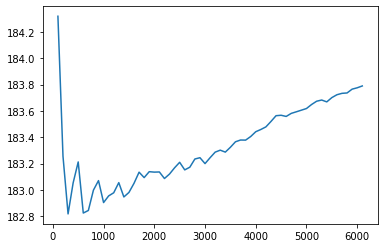

In [ ]:
plt.plot(list(range(100, 6200, 100)), mean_list)
plt.show()

__Выборчная дисперсия__, как следует из названия, оценивает дисперсию случайной величины:
$$\sigma_X^2 = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2$$

__Пример 2__

Посчитаем выборочную дисперсию роста хоккеистов.

In [ ]:
((df['height'] - df['height'].mean()) ** 2).sum() / df['height'].shape[0]

29.885888087815086

То же с помощью готовой функции `.var`:

In [ ]:
df['height'].var()

29.894963668771

Значения не совпали. Почему?

Несмотря на кажущуюся естественность, данная оценка является не очень хорошей в силу своей __смещённости__. Поэтому в практических задачах используют __несмещённую оценку дисперсии__:
$$\sigma_{X, \: unbiased}^2 = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2$$

__Пример 3__

Несмещённая оценка дисперсии роста хоккеистов:

In [ ]:
((df['height'] - df['height'].mean()) ** 2).sum() / (df['height'].shape[0] - 1)

29.894963668771

Что такое смещённая и несмещённая оценки?

На самом деле каждый объект из выборки — это тоже случайная величина (поскольку выбирается случайным образом). В таком случае и любая статистика (т.е. функция от выборки) является случайной величиной.

Оценка некоторого параметра случайной величины называется __несмещённой__, если математическое ожидание этой оценки равняется реальному значению этого параметра.

Например, пусть выборка $X$ берётся из значений случайной величины $x$.Тогда выборочное среднее является несмещённой оценкой математического ожидания:
$$M \left( \overline{X} \right) = M(x)$$
    
В практическом смысле это означает, что если мы рассмотрим большое количество различных выборок, то, хотя выборочное среднее каждой из них вряд ли будет равно математическому ожиданию $x$, в среднем мы получим именно его.
    
Оказывается, обычная оценка дисперсии является смещённой:
$$M \left(\sigma_X^2 \right) = \dfrac{n - 1}{n} D(x)$$

_Замечание_. При оценке дисперсии (да и вообще) используют именно несмещённые оценки. В дальнейшем под $\sigma_X^2$ мы будем понимать именно несмещённую оценку:
$$\sigma_X^2 = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2$$

Контролировать смещение этой и подобных оценок можно с помощью аргумента `ddof` (Delta Degrees of Freedom). В этом параметре указывается то, сколько нужно вычесть из количества элементов в выборке. Например, смещённую оценку можно получить, указав аргумент `ddof=0`:

In [ ]:
df['height'].var(ddof=0)

29.885888087815086

_Замечание_: с этим параметром стоит быть осторожным, потому что его значение по умолчанию отличается в библиотеках `numpy` и `pandas`:

In [ ]:
help(pd.DataFrame.var)

Help on function var in module pandas.core.frame:

var(self, axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
    Return unbiased variance over requested axis.
    
    Normalized by N-1 by default. This can be changed using the ddof argument
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    ddof : int, default 1
        Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
        where N represents the number of elements.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    
    Returns
    ---

In [ ]:
import numpy as np

In [ ]:
help(np.var)

Help on function var in module numpy:

var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the variance along the specified axis.
    
    Returns the variance of the array elements, a measure of the spread of a
    distribution.  The variance is computed for the flattened array by
    default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose variance is desired.  If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the variance is computed.  The default is to
        compute the variance of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a variance is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the variance.  For arrays of integer t

Вообще, дисперсия является не очень наглядной мерой разброса, поскольку имеет другую размерность. Поэтому часто наряду (или даже вместо) с дисперсией используют __среднее квадратическое отклонение__, равное корню из дисперсии (таким образом размерность такой оценки будет равна размерности исходного параметра) .

Оценивается среднее квадратическое отклонение аналогично дисперсии. Смещённая и несмещённая оценки:
$$\sigma_X = \sqrt{\dfrac{1}{n} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}, \:\:
\sigma_{X, \: unbiased} = \sqrt{\dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}$$

Как и в случае с дисперсией, под $\sigma_X$ все понимают именно _несмещённую_ оценку.

__Пример 4__

Среднее квадратическое отклонение роста хоккеистов (несмещённая оценка):

In [ ]:
np.sqrt(((df['height'] - df['height'].mean()) ** 2).sum() / (df['height'].shape[0] - 1))

5.467628706191652

То же с помощью готовой функции `.std`:

In [ ]:
df['height'].std(ddof=1)

5.467628706191652

В среднем рост хоккеистов отклоняется от своего среднего примерно на $5.4676$.

### Мода,  медиана, квантиль

__Мода__ — наиболее часто встречающееся в выборке значение.

__Пример 5__

Для начала посмотрим, как часто встречаются в выборке те или иные значения роста. Это можно сделать с помощью метода `.value_counts`:

In [ ]:
df['height'].value_counts().head(10)

183    586
180    580
185    510
188    478
182    464
184    388
178    360
186    332
181    297
190    284
Name: height, dtype: int64

Чаще всего встречается значение $183$. Это и есть мода. Её можно также посчитать с помощью метода `.mode`:

In [ ]:
df['height'].mode()

0    183
Name: height, dtype: int64

Обычно мода рассматривается в том же контексте, что и выборочное среднее: она позволяет получить некоторую информацию о выборке «в среднем».

In [ ]:
df['height'].mean()

183.829386763813

__Медиана__ — такое значение $t$, что половина элементов из выборки меньше, либо равна $t$, и, соответственно, половина больше, либо равна $t$.

Медиана представляет собой _середину_ выборки: если отсортировать элементы выборки по возрастанию, то медиана приходится на середину. 

Медиана может приходиться как на промежуток между элементами выборки, так и на конкретный элемент.

__Пример 6__

Посчитаем медиану роста хоккеистов. Для начала воспользуемся определением. Нужно отсортировать значения из выборки и взять середину этого массива. Посчитаем размер выборки:

In [ ]:
height = sorted(df['height'])

length = len(height)
length

3294

In [ ]:
length // 2

1647

В выборке чётное число элементов, значит, медиана придётся на промежуток на стыке двух половинок массива, т.е. где-то между элементами с индексами `length / 2 - 1` и `length / 2`.

In [ ]:
height[length // 2 - 1 : length // 2 + 1]

[184, 184]

В нашем случае оба значения равны, поэтому медиана равна $184$. Посмотрим, сколько процентов выборки лежат слева и справа от медианы.

In [ ]:
median = 184

(df['height'] <= median).sum() / length

0.5525197328476017

In [ ]:
(df['height'] >= median).sum() / length

0.5057680631451124

In [ ]:
df['height'].median()

184.0

Медиана также является мерой среднего, как выборочное среднее и мода.

In [ ]:
df['height'].mean()

183.829386763813

В случаях, когда число элементов в выборке нечётно, медианой является значение, которое стоит ровно посередине отсортированного массива. Если же в массиве чётное число значений, ровную середину посчитать невозможно, поэтому медианой может служить любое значение между крайним правым значением левой половины и крайним левым значением правой половины.

In [ ]:
help(np.quantile)

Help on function quantile in module numpy:

quantile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the q-th quantile of the data along the specified axis.
    
    .. versionadded:: 1.15.0
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Quantile or sequence of quantiles to compute, which must be between
        0 and 1 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the quantiles are computed. The
        default is to compute the quantile(s) along a flattened
        version of the array.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
        but the type (of the output) will be cast if necessary.
    overwrite_input : bool, optional
        If True, then allow t

Медиана является частным случаем более общего понятия — _квантиля_. 

Пусть $\alpha \in (0, 1)$. __Квантиль порядка $\alpha$__ — такое число $t_\alpha$, что «$\alpha$ процентов» всех элементов выборки меньше $t_\alpha$ и, соответственно, «$(1 - \alpha)$ процентов» элементов — больше $t_\alpha$.

Как и в случае с медианой, квантиль может как приходиться на один из элементов выборки, так и лежать где-то между ними.

Из определения следует, что медиана является квантилем порядка $0.5$. Кроме того, часто используют:

* __первый квартиль__ — квантиль порядка $0.25$ (т.е. значение, которое не превышают $25 \%$ значений из выборки),
* __второй квартиль__ — то же, что и медиана,
* __третий квартиль__ — квантиль порядка $0.75$.

Также могут встречаться:
* __децили__ — то же, что и квартили, но делим мы не на $4$ части, а на $10$. Например, медиана будет пятым децилем,
* __перцентили__ — это просто другой способ задать квантиль. Здесь мы используем не долю $\alpha \in (0, 1)$, а процент. Например, третий квартиль будет $75$-перцентилем.

__Пример 7__

Посчитаем первый и третий квартили значений роста хоккеистов. Вычисления аналогичны случаю вычисления медианы, однако нам нужно делить массив не в пропорции $1 : 1$, а в пропорции $\alpha : (1 - \alpha)$. Например, первый квартиль:

In [ ]:
length % 4 == 0

False

In [ ]:
length // 2

1647

In [ ]:
(length // 2 + 1) // 2

824

In [ ]:
height[(length // 2 + 1) // 2 - 1 : (length // 2 + 1) // 2 + 2]

[180, 180, 180]

In [ ]:
q1 = 180

(df['height'] <= q1).sum() / length

0.29143897996357016

In [ ]:
(df['height'] >= q1).sum() / length

0.8011536126290225

In [ ]:
df['height'].quantile(0.25)

180.0

Третий квартиль:

In [ ]:
height[(length * 3 // 2 + 1) // 2 - 1 : (length * 3 // 2 + 1) // 2 + 2]

[188, 188, 188]

In [ ]:
q3 = 188

(df['height'] <= q3).sum() / length

0.8169398907103825

In [ ]:
(df['height'] >= q3).sum() / length

0.2641165755919854

In [ ]:
df['height'].quantile(0.75)

188.0

В этот метод можно подать список значений, тогда посчитаются различные квантили:

In [ ]:
df['height'].quantile([0.25, 0.5, 0.75])

0.25    180.0
0.50    184.0
0.75    188.0
Name: height, dtype: float64

In [ ]:
df['height'].describe()

count    3294.000000
mean      183.829387
std         5.467629
min       165.000000
25%       180.000000
50%       184.000000
75%       188.000000
max       205.000000
Name: height, dtype: float64

__Интерквартильный размах__ — это отрезок между первым и третьим квартилями. Это отрезок, в который попадают $50 \%$ значений выборки.

Интерквартильный размах используется для измерения разброса значений выборки вокруг среднего. Иногда его использование оказывается более предпочтительным, чем использование среднего квадратического отклонения, поскольку не учитывает выбросы в данных.

Например, рассмотрим синтетическую выборку, в которой $1000$ раз встречается значение $1$, и всего однажды появляется значение $10000$. Его выборочное среднее и среднее квадратическое отклонение:

In [ ]:
list_ = [1] * 1000 + [10000]

In [ ]:
np.mean(list_), np.std(list_, ddof=1)

(10.989010989010989, 316.03816364344493)

При этом, интерквартильный размах:

In [ ]:
np.quantile(list_, [0.25, 0.75])

array([1., 1.])

#### Квантиль случайной величины

Понятие квантиля также можно определить для случайной величины. Суть определения такая же, что и в случае выборки, но выглядит немного страшнее.

__Квантилем порядка $\alpha$ случайной величины $X$__ называется такое значение $t_\alpha$, что
$$P(X \leq t_\alpha) = \alpha, \:\: P(X \geq t_\alpha) = 1 - \alpha$$

Идея та же: в доле $\alpha$ всех случаев значение случайной величины $X$ окажется меньше $t_\alpha$ и в доле $(1 - \alpha)$ случаев — больше $t_\alpha$.

Использование квантилей позволяет в некотором смысле «обратить» функцию распределения.

Для случайной величины $X$ функция распределения выглядит следующим образом:
$$F_X(x) = P(X \leq x)$$

Прямая задача выглядит так: имеется случайная величина $X$ и пороговое значение $t$. Требуется найти вероятность того, что величина $X$ не превосходит значения $t$. Для этого нужна функция распределения.

Часто в задачах математической статистики требуется решить обратную задачу: имеется случайная величина $X$ и значение вероятности $\alpha \in (0, 1)$. Требуется найти пороговое значение $t$, такое, что $P(X \leq t) = \alpha$. Это и есть квантиль порядка $\alpha$.

### Графическое представление данных

Для визуализации распределения значений выборки часто используется гистограмма. Как строится гистограмма?

1. По оси $x$ откладываются всевозможные значения из выборки. 
2. Вся ось разбивается на какое-то заданное число одинаковых отрезков.
3. Для каждого отрезка вычисляется число значений выборки, которые лежат в этом отрезке, и это число откладывается по оси $y$.

__Пример 8__

Построим гистограмму значений роста. Для этого можно использовать метод `.hist`. В качестве аргумента `bins` сюда подаётся то число одинаковых отрезков, на которое мы разбиваем ось $x$.

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

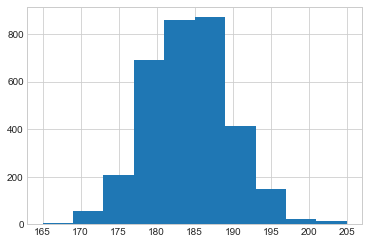

In [ ]:
df['height'].hist()

Построим гистограмму ещё раз, указав в качестве аргумента `bins` число $20$, чтобы получить более детальную картину:

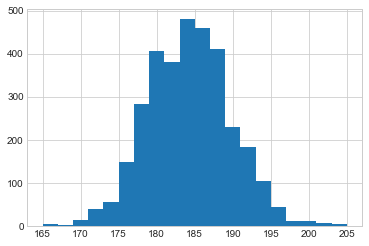

In [ ]:
df['height'].hist(bins=20)

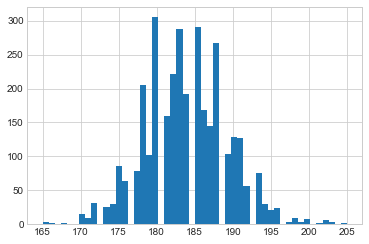

In [ ]:
df['height'].hist(bins=50)

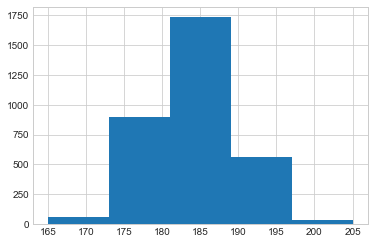

In [ ]:
df['height'].hist(bins=5)

Гистограмма по форме напоминает график распределения вероятностей случайной величины. Нужно лишь нормировать откладываемые по оси $y$ значения, чтобы сумма площадей колонок стала равной $1$. Это можно сделать с помощью аргумента `density`.

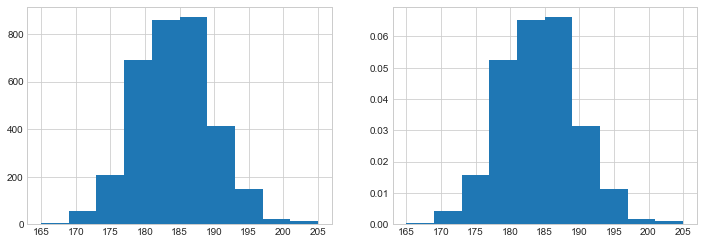

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

df['height'].hist(ax=ax1)

df['height'].hist(ax=ax2, density=True)

Другой способ визуализировать одномерные данные — __boxplot__ или __ящик с усами__. В самом ящике отмечены квартили $Q_1$, $Q_2$ (медиана), $Q_3$. «Усы» здесь — границы отрезка
$$\left[ Q_1 - 1.5 \times IQR, \: Q_3 + 1.5 \times IQR \right],$$
где $IQR$ — интерквартильное расстояние.

__Пример 9__

Построим `boxplot` роста хоккеистов.

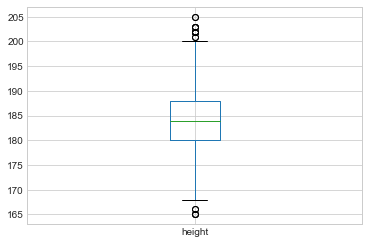

In [ ]:
df[['height']].boxplot()

In [ ]:
import seaborn as sns

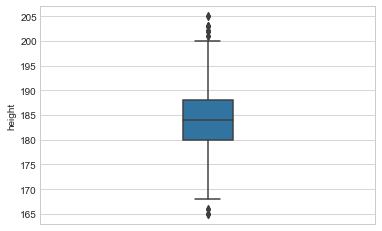

In [ ]:
sns.boxplot(df['height'], orient='v', width=0.15)

Всё, что выходит за границы этого отрезка, считается выбросами (отмечены кружками). Посчитаем, сколько значений роста оказалось за пределами «усов».

In [ ]:
q1 = df['height'].quantile(0.25)
q3 = df['height'].quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(168.0, 200.0)

In [ ]:
outliers = df.loc[(df['height'] < boxplot_range[0]) | (df['height'] > boxplot_range[1])]

outliers.shape[0]

19

In [ ]:
outliers

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
285,2001,SVK,3,chara zdeno,D,L,202,105.0,1977-03-18,new york islanders,24.120465,1977,25.732771
356,2001,USA,25,gill hal,D,L,202,109.0,1975-04-06,boston bruins,26.069815,1975,26.713067
399,2002,AUT,32,lakos andre,D,L,202,104.0,1979-07-29,utah grizzlies,22.757016,1979,25.487697
827,2004,AUT,32,lakos andre,D,R,203,103.0,1979-07-29,vienna capitals,24.758385,1979,24.994540
1095,2004,SVK,3,chara zdeno,D,L,205,117.0,1977-03-18,ottawa senators,27.121150,1977,27.840571
1166,2004,USA,26,gill hal,D,L,202,100.0,1975-04-06,boston bruins,29.070500,1975,24.507401
1217,2005,AUT,32,lakos andre,D,R,203,103.0,1979-07-29,syracuse crunch,25.757700,1979,24.994540
1488,2005,SVK,3,chara zdeno,D,L,205,117.0,1977-03-18,farjestad karlstad,28.120465,1977,27.840571
1563,2005,USA,25,gill hal,D,L,201,108.0,1975-04-06,lukko rauma,30.069815,1975,26.732012
1707,2006,ITA,11,fontanive nicola,F,L,165,71.0,1985-10-25,hc alleghe,20.514716,1985,26.078972


Доля выбросов:

In [ ]:
outliers.shape[0] / df.shape[0]

0.005768063145112325

### Задачи для тренировки

__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

__Задача 2__

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из `boxplot`). 

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

__Задача 3__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?